<a href="https://colab.research.google.com/github/descartesmbogning/Deciphering_Bacteriophage_Revolution/blob/main/1_scholar_analysis_trend2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
from functools import reduce
import seaborn as sns
import missingno as msno
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.stats import norm


In [ ]:
# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [ ]:
from scipy import stats #the only import you actually need for this
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [ ]:
# function that tests distribution then picks test accordingly
def test_sig(x, y):
    if stats.shapiro(x).pvalue >= 0.05 and stats.shapiro(y).pvalue >= 0.05: #if they are normally distriuted
        print("t-test")
        return stats.ttest_ind(x,y)
    else:
        print("mann-whitney")
        return stats.mannwhitneyu(x, y)

## import data

In [ ]:
#Import data
data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/first_clean/data_scholar_all_year_merge.pkl')
data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])
data.head()

,Publication Type,Authors,Author Full Names,Article Title,Source Title,Language,Document Type,Author Keywords,Keywords Plus,Abstract,...,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export
wos_ID,,,,,,,,,,,,,,,,,,,,,
wos:a1975ak27200035,j,"modrich, p; richardson, cc","modrich, p; richardson, cc",bacteriophage-t7 deoxyribonucleic-acid replica...,journal of biological chemistry,english,article,NaN,NaN,NaN,...,8,biochemistry & molecular biology,science citation index expanded (sci-expanded),biochemistry & molecular biology,ak272,1095579.0,NaN,NaN,NaN,2023-06-30
wos:a1975bb78600005,j,"esche, h; schweiger, m; trautner, ta","esche, h; schweiger, m; trautner, ta",gene-expression of bacteriophage spp1 .1. phag...,molecular & general genetics,english,article,NaN,NaN,NaN,...,11,biochemistry & molecular biology; genetics & h...,science citation index expanded (sci-expanded),biochemistry & molecular biology; genetics & h...,bb786,814401.0,NaN,NaN,NaN,2023-06-30
wos:a1975ak49300025,j,"jazwinski, sm; lindberg, aa; kornberg, a","jazwinski, sm; lindberg, aa; kornberg, a",gene-h spike protein of bacteriophages phi-x17...,virology,english,article,NaN,NaN,NaN,...,11,virology,science citation index expanded (sci-expanded),virology,ak493,1094682.0,NaN,NaN,NaN,2023-06-30
wos:a1975al49000001,j,"silberstein, s; inouye, m; studier, fw","silberstein, s; inouye, m; studier, fw",studies on role of bacteriophage t7 lysozyme d...,journal of molecular biology,english,article,NaN,NaN,NaN,...,11,biochemistry & molecular biology,science citation index expanded (sci-expanded),biochemistry & molecular biology,al490,1099209.0,NaN,NaN,NaN,2023-06-30
wos:a1975ay53300001,j,"levy, jn","levy, jn",effects of radiophosphorus decay in bacterioph...,virology,english,article,NaN,NaN,NaN,...,13,virology,science citation index expanded (sci-expanded),virology,ay533,1189291.0,NaN,NaN,NaN,2023-06-30


In [ ]:
# Check the number of papers
num_papers = data.shape[0]
print(f"Number of Papers: {num_papers}")


Number of Papers: 61544


# Publications trends

In [ ]:
data_trend = data['Publication Year'].value_counts().reset_index().sort_values('index')
data_trend

,index,Publication Year
34,1975,572
33,1976,587
37,1977,528
35,1978,550
38,1979,521
36,1980,532
39,1981,468
40,1982,457
44,1983,406
42,1984,417


In [ ]:
# Calculate the inverse cumulative proportion
data_trend['Inverse Cumulative Proportion'] = data_trend['Publication Year'].iloc[::-1].cumsum() / data_trend['Publication Year'].sum()

data_trend

,index,Publication Year,Inverse Cumulative Proportion
34,1975,572,1.000000
33,1976,587,0.990706
37,1977,528,0.981168
35,1978,550,0.972589
38,1979,521,0.963652
36,1980,532,0.955187
39,1981,468,0.946542
40,1982,457,0.938938
44,1983,406,0.931512
42,1984,417,0.924916


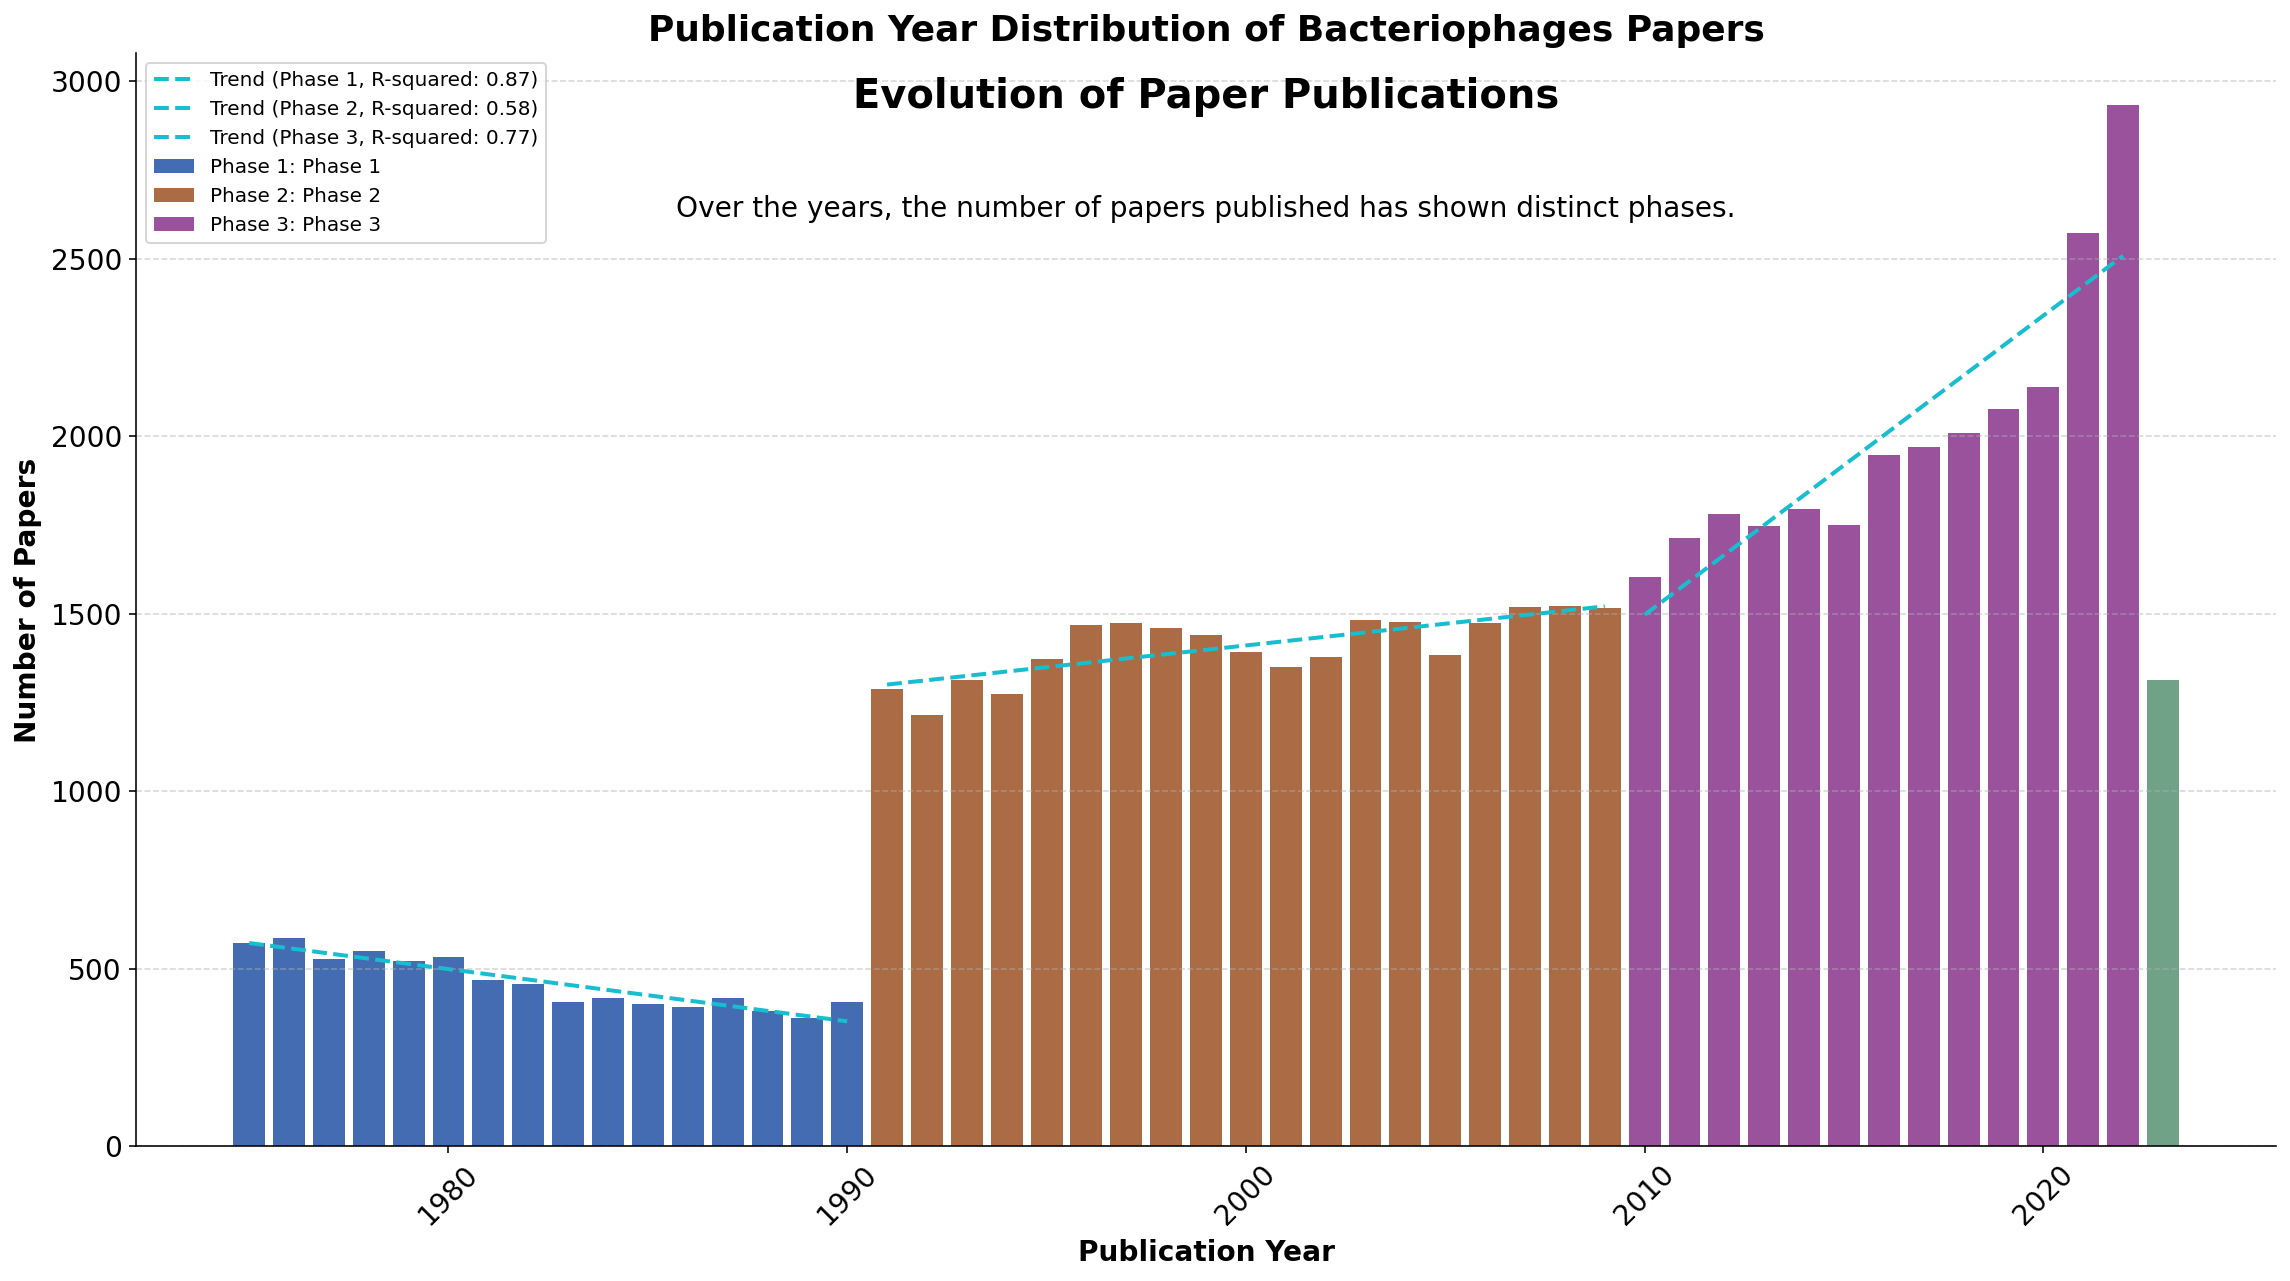

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Data
data = {
    'Publication Year': [1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
                         1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
                         2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
                         2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Count': [572, 587, 528, 550, 521, 532, 468, 457, 406, 417, 400, 391, 418, 380, 361, 407, 1289, 1216,
              1314, 1274, 1373, 1468, 1475, 1460, 1441, 1393, 1349, 1377, 1481, 1476, 1384, 1473, 1518,
              1523, 1517, 1602, 1714, 1781, 1747, 1796, 1749, 1947, 1969, 2009, 2078, 2138, 2572, 2932, 1314]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Create a figure and axes with enlarged size
fig, ax = plt.subplots(figsize=(16, 9))

# Set colors
bar_color = '#70a288'  # Green color for bars
trendline_color = '#d62728'  # Red color for trendline
phase_colors = ['#446cb3', '#ab6b44', '#9a529c']  # Blue, Orange, and Purple colors for phases
trendline_phase_color = '#17becf'  # Teal color for trendline associated with phase

# Create the bar plot with custom color
bars = ax.bar(df['Publication Year'], df['Count'], color=bar_color)

# Define the phases of the trend
phases = [
    {'start': 1975, 'end': 1990, 'label': 'Phase 1'},
    {'start': 1991, 'end': 2009, 'label': 'Phase 2'},
    {'start': 2010, 'end': 2022, 'label': 'Phase 3'}
]

# Calculate the trendline and R-squared value for each phase
for i, phase in enumerate(phases):
    phase_data = df[(df['Publication Year'] >= phase['start']) & (df['Publication Year'] <= phase['end'])]
    slope, intercept, r_value, p_value, std_err = linregress(phase_data['Publication Year'], phase_data['Count'])
    phase_line = slope * phase_data['Publication Year'] + intercept
    r_squared = r_value ** 2

    # Highlight the phase with a different color
    ax.bar(
        phase_data['Publication Year'],
        phase_data['Count'],
        color=phase_colors[i],
        label=f'Phase {i + 1}: {phase["label"]}',
    )

    # Plot the trendline associated with the phase with different color
    ax.plot(
        phase_data['Publication Year'],
        phase_line,
        color=trendline_phase_color,
        linestyle='--',
        linewidth=2,
        label=f'Trend (Phase {i + 1}, R-squared: {r_squared:.2f})',
    )

# Customize the plot
ax.set_xlabel('Publication Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Papers', fontsize=14, fontweight='bold')
ax.set_title('Publication Year Distribution of Bacteriophages Papers', fontsize=18, fontweight='bold')

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Set font size and rotation angle for tick labels
ax.tick_params(axis='x', labelsize=14, rotation=45)
ax.tick_params(axis='y', labelsize=14)

# Add a narrative description
ax.text(
    0.5,
    0.95,
    'Evolution of Paper Publications',
    transform=ax.transAxes,
    ha='center',
    fontsize=20,
    fontweight='bold',
)
ax.text(
    0.5,
    0.85,
    'Over the years, the number of papers published has shown distinct phases.',
    transform=ax.transAxes,
    ha='center',
    fontsize=14,
)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend for the different phases and trends
ax.legend(loc='upper left', fontsize=10)

# Save the plot at 300 dpi
plt.tight_layout()
plt.savefig('D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/figure/publication_year_plot.png', dpi=300)

# Show the plot (optional)
plt.show()


# countries, region and income

## import data

In [ ]:
#Import data
country_data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/countries_all.pkl').reset_index()
country_data = country_data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
country_data.head()

,,Addresses,United States,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Vietnam,Yemen,Zambia,Zimbabwe,Bahamas,Bosnia and Herzegovina,Montenegro,Macau,Seychelles,Vatican
wos_ID,Publication Year,,,,,,,,,,,,,,,,,,,,,
wos:a1975ak27200035,1975,"harvard univ, med sch, dept biol chem, boston,...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975bb78600005,1975,"max planck inst molek genet,abt trautner,ihne ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ak49300025,1975,"stanford univ, sch med, dept biochem, stanford...",2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975al49000001,1975,"suny, dept biochem, stony brook, ny 11794 usa;...",2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ay53300001,1975,"univ washington, dept genet, seattle, wa 98105...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
citation_data = data.copy().reset_index().set_index(['wos_ID','Publication Year'])[['Times Cited, All Databases']]
citation_data

,,"Times Cited, All Databases"
wos_ID,Publication Year,
wos:a1975ak27200035,1975,106
wos:a1975bb78600005,1975,28
wos:a1975ak49300025,1975,50
wos:a1975al49000001,1975,31
wos:a1975ay53300001,1975,3
...,...,...
wos:000968835000001,2023,0
wos:000933339800001,2023,0
wos:000914484900001,2023,5


In [ ]:
country_data_citation = pd.concat([country_data, citation_data], axis=1)
country_data_citation.head(2)

,,Addresses,United States,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Yemen,Zambia,Zimbabwe,Bahamas,Bosnia and Herzegovina,Montenegro,Macau,Seychelles,Vatican,"Times Cited, All Databases"
wos_ID,Publication Year,,,,,,,,,,,,,,,,,,,,,
wos:a1975ak27200035,1975,"harvard univ, med sch, dept biol chem, boston,...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106
wos:a1975bb78600005,1975,"max planck inst molek genet,abt trautner,ihne ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28


In [ ]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in country_data_citation.columns[:-1]:
    publication_counts[column] = country_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = country_data_citation[country_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = country_data_citation[country_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['Country', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['Country', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['Country', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='Country', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='Country', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('Country')['Publication Count']['Addresses']*100

# #save data
final_merged_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/countries_count_citation_list.csv')

final_merged_df.head(60)

,Country,Publication Count,Total Citation,Average Citation Count,%
0,Addresses,57217,2333188,40.777881,100.000000
1,United States,23296,1274700,54.717548,40.715172
2,Albania,5,121,24.200000,0.008739
3,Algeria,5,152,30.400000,0.008739
4,Argentina,280,7175,25.625000,0.489365
5,Armenia,14,85,6.071429,0.024468
6,Australia,1577,57642,36.551680,2.756174
7,Austria,503,22514,44.759443,0.879109
8,Azerbaijan,2,31,15.500000,0.003495
9,Bahrain,4,69,17.250000,0.006991


In [ ]:
# Reset the index to make 'Publication Year' a regular column
country_data2 = country_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
country_data2['Year Group'] = pd.cut(country_data2['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Drop unnecessary columns
country_data2.drop(['wos_ID', 'Publication Year', 'Addresses'], axis=1, inplace=True)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_df = pd.melt(country_data2, id_vars=['Year Group', 'Times Cited, All Databases'], var_name='Country', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_df.dropna(subset=['Publication'], inplace=True)

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped = melted_df.groupby(['Year Group', 'Country']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Rename columns
grouped.columns = ['Year Group', 'Country', 'Publication Count',	'Total Citation']


grouped

,Year Group,Country,Publication Count,Total Citation
0,"(1973, 1978]",Albania,0,0
1,"(1973, 1978]",Algeria,0,0
2,"(1973, 1978]",Argentina,2,53
3,"(1973, 1978]",Armenia,0,0
4,"(1973, 1978]",Australia,19,686
...,...,...,...,...
1545,"(2018, 2023]",Venezuela,5,20
1546,"(2018, 2023]",Vietnam,38,493
1547,"(2018, 2023]",Yemen,1,12
1548,"(2018, 2023]",Zambia,1,1


In [ ]:
# Pivot the DataFrame
pivot_df = grouped.pivot(index='Country', columns='Year Group', values=['Publication Count',	'Total Citation'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/countries_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/countries_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count                                         \
Year Group      (1973, 1978] (1978, 1983] (1983, 1988] (1988, 1993]   
Country                                                               
Albania                    0            0            0            0   
Algeria                    0            0            0            0   
Argentina                  2            1            3            6   
Armenia                    0            0            0            0   
Australia                 19           10           22           69   
...                      ...          ...          ...          ...   
Venezuela                  0            0            0            0   
Vietnam                    0            0            0            0   
Yemen                      0            0            0            0   
Zambia                     0            0            0            0   
Zimbabwe                   0            0            0            0   

                                                                             \
Year Group (1993, 1998] (1998, 2003] (2003, 2008] (2008, 2013] (2013, 2018]   
Country                                                                       
Albania               0            1            0            0            2   
Algeria               0            1            1            2            0   
Argentina            22           32           45           47           63   
Armenia               0            0            1            2            4   
Australia           139          175          195          239          289   
...                 ...          ...          ...          ...          ...   
Venezuela             1            5            3            1            0   
Vietnam               0            3            8           10           33   
Yemen                 0            0            1            0            0   
Zambia                0            1            4            1            0   
Zimbabwe              0            1            1            2            0   

                        Total Citation                                         \
Year Group (2018, 2023]   (1973, 1978] (1978, 1983] (1983, 1988] (1988, 1993]   
Country                                                                         
Albania               2              0            0            0            0   
Algeria               1              0            0            0            0   
Argentina            59             53           17           24          106   
Armenia               7              0            0            0            0   
Australia           420            686          161          631         6062   
...                 ...            ...          ...          ...          ...   
Venezuela             5              0            0            0            0   
Vietnam              38              0            0            0            0   
Yemen                 1              0            0            0            0   
Zambia                1              0            0            0            0   
Zimbabwe              1              0            0            0            0   

                                                                             \
Year Group (1993, 1998] (1998, 2003] (2003, 2008] (2008, 2013] (2013, 2018]   
Country                                                                       
Albania               0            8            0            0           96   
Algeria               0           19           82           49            0   
Argentina           457         1472         2256         1223         1224   
Armenia               0            0            8            4           32   
Australia          6111         8266        11529        10028         8658   
...                 ...          ...          ...          ...          ...   
Venezuela           102           61           51           39 

# region

## UN REGION GROUP

In [ ]:
un_region_group = ['Addresses','un_north_africa','un_eastern_africa','un_middle_africa','un_Southern_africa','un_Western_africa',
    'un_Latin_America_and_the_Caribbean','un_Northern_America',
    'un_Central_Asia','un_Eastern_Asia','un_South_eastern_Asia','un_Southern_Asia','un_Western_Asia',
    'un_Eastern_Europe','un_Northern_Europe','un_Southern_Europe','un_Western_Europe',
    'un_Australia_and_New_Zealand','un_Melanesia','un_Micronesia','un_Polynesia']

In [ ]:
#Import data
un_region_group_data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/countries_and_un_wb_region_income_all.pkl')#.reset_index()#[un_region_group]

# Only keep regions that are columns in the DataFrame
un_region_group = [region for region in un_region_group if region in un_region_group_data.columns]#

# Select columns and reset index
un_region_group_data = un_region_group_data[un_region_group].reset_index()

# Rename columns and set index
un_region_group_data = un_region_group_data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
un_region_group_data.head()

,,Addresses,un_north_africa,un_eastern_africa,un_middle_africa,un_Southern_africa,un_Western_africa,un_Latin_America_and_the_Caribbean,un_Northern_America,un_Central_Asia,un_Eastern_Asia,un_South_eastern_Asia,un_Southern_Asia,un_Western_Asia,un_Eastern_Europe,un_Northern_Europe,un_Southern_Europe,un_Western_Europe,un_Australia_and_New_Zealand,un_Melanesia
wos_ID,Publication Year,,,,,,,,,,,,,,,,,,,
wos:a1975ak27200035,1975,"harvard univ, med sch, dept biol chem, boston,...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975bb78600005,1975,"max planck inst molek genet,abt trautner,ihne ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
wos:a1975ak49300025,1975,"stanford univ, sch med, dept biochem, stanford...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975al49000001,1975,"suny, dept biochem, stony brook, ny 11794 usa;...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ay53300001,1975,"univ washington, dept genet, seattle, wa 98105...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
un_region_group_data_citation = pd.concat([un_region_group_data, citation_data], axis=1)
un_region_group_data_citation.head(2)

,,Addresses,un_north_africa,un_eastern_africa,un_middle_africa,un_Southern_africa,un_Western_africa,un_Latin_America_and_the_Caribbean,un_Northern_America,un_Central_Asia,un_Eastern_Asia,un_South_eastern_Asia,un_Southern_Asia,un_Western_Asia,un_Eastern_Europe,un_Northern_Europe,un_Southern_Europe,un_Western_Europe,un_Australia_and_New_Zealand,un_Melanesia,"Times Cited, All Databases"
wos_ID,Publication Year,,,,,,,,,,,,,,,,,,,,
wos:a1975ak27200035,1975,"harvard univ, med sch, dept biol chem, boston,...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106
wos:a1975bb78600005,1975,"max planck inst molek genet,abt trautner,ihne ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,28


In [ ]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in un_region_group_data_citation.columns[:-1]:
    publication_counts[column] = un_region_group_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = un_region_group_data_citation[un_region_group_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = un_region_group_data_citation[un_region_group_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['un_region', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['un_region', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['un_region', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='un_region', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='un_region', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('un_region')['Publication Count']['Addresses']*100

# #save data
final_merged_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/un_region_count_citation_list.csv')

final_merged_df.head(60)

,un_region,Publication Count,Total Citation,Average Citation Count,%
0,Addresses,57217,2333188,40.777881,100.000000
1,un_north_africa,398,7738,19.442211,0.695597
2,un_eastern_africa,129,2995,23.217054,0.225457
3,un_middle_africa,26,718,27.615385,0.045441
4,un_Southern_africa,300,8428,28.093333,0.524320
5,un_Western_africa,93,1596,17.161290,0.162539
6,un_Latin_America_and_the_Caribbean,92,2655,28.858696,0.160791
7,un_Northern_America,25402,1362257,53.627943,44.395896
8,un_Central_Asia,15,67,4.466667,0.026216
9,un_Eastern_Asia,9938,241745,24.325317,17.368964


In [ ]:
# Reset the index to make 'Publication Year' a regular column
un_region_group_data2 = un_region_group_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
un_region_group_data2['Year Group'] = pd.cut(un_region_group_data2['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Drop unnecessary columns
un_region_group_data2.drop(['wos_ID', 'Publication Year', 'Addresses'], axis=1, inplace=True)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_df = pd.melt(un_region_group_data2, id_vars=['Year Group', 'Times Cited, All Databases'], var_name='un_region', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_df.dropna(subset=['Publication'], inplace=True)

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped = melted_df.groupby(['Year Group', 'un_region']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Rename columns
grouped.columns = ['Year Group', 'un_region', 'Publication Count',	'Total Citation']


grouped

,Year Group,un_region,Publication Count,Total Citation
0,"(1973, 1978]",un_Australia_and_New_Zealand,29,3122
1,"(1973, 1978]",un_Central_Asia,0,0
2,"(1973, 1978]",un_Eastern_Asia,156,3877
3,"(1973, 1978]",un_Eastern_Europe,150,765
4,"(1973, 1978]",un_Latin_America_and_the_Caribbean,2,24
...,...,...,...,...
175,"(2018, 2023]",un_Western_Europe,1750,20324
176,"(2018, 2023]",un_Western_africa,43,330
177,"(2018, 2023]",un_eastern_africa,58,548
178,"(2018, 2023]",un_middle_africa,9,82


In [ ]:
# Pivot the DataFrame
pivot_df = grouped.pivot(index='un_region', columns='Year Group', values=['Publication Count',	'Total Citation'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/un_region_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/un_region_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count               \
Year Group                              (1973, 1978] (1978, 1983]   
un_region                                                           
un_Australia_and_New_Zealand                      29           19   
un_Central_Asia                                    0            0   
un_Eastern_Asia                                  156           97   
un_Eastern_Europe                                150           68   
un_Latin_America_and_the_Caribbean                 2            0   
un_Melanesia                                       0            0   
un_Northern_America                             1039          763   
un_Northern_Europe                               173          121   
un_South_eastern_Asia                              2            3   
un_Southern_Asia                                  30           41   
un_Southern_Europe                                36           34   
un_Southern_africa                                 7           10   
un_Western_Asia                                   29           16   
un_Western_Europe                                370          221   
un_Western_africa                                  0            0   
un_eastern_africa                                  0            0   
un_middle_africa                                   0            0   
un_north_africa                                    5            1   

                                                                           \
Year Group                         (1983, 1988] (1988, 1993] (1993, 1998]   
un_region                                                                   
un_Australia_and_New_Zealand                 25           79          167   
un_Central_Asia                               0            0            1   
un_Eastern_Asia                              80          246          504   
un_Eastern_Europe                            52          126          213   
un_Latin_America_and_the_Caribbean            0            3            7   
un_Melanesia                                  0            0            3   
un_Northern_America                         673         1947         3093   
un_Northern_Europe                          123          413          967   
un_South_eastern_Asia                         1           10           26   
un_Southern_Asia                             34           41           93   
un_Southern_Europe                           48          190          400   
un_Southern_africa                           11           11           11   
un_Western_Asia                               9           36           70   
un_Western_Europe                           227          680         1279   
un_Western_africa                             2            1            2   
un_eastern_africa                             0            5            4   
un_middle_africa                              1            1            5   
un_north_africa                               0            6           17   

                                                                           \
Year Group                         (1998, 2003] (2003, 2008] (2008, 2013]   
un_region                                                                   
un_Australia_and_New_Zealand                209          234          294   
un_Central_Asia                               0            1            0   
un_Eastern_Asia                             780         1008         1586   
un_Eastern_Europe                           346          318          405   
un_Latin_America_and_the_Caribbean           15           15           17   
un_Melanesia                                  1            0            2   
un_Northern_America                        3213         3423         3642   
un_Northern_Europe                         1234         1142         1274   
un_South_eastern_Asia                        43           92          144   
un_Southern_Asia                           

## WB REGION GROUP

In [ ]:
wb_region_group = ['Addresses','wb_east_asia_and_pacific', 'wb_europe_and_central_asia', 'wb_latin_america_and_the_caribbean', 'wb_middle_east_and_north_africa', 'wb_north_america', 'wb_south_asia', 'wb_sub_saharan_africa',
]

In [ ]:
#Import data
wb_region_group_data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/countries_and_un_wb_region_income_all.pkl')#.reset_index()#[un_region_group]

# Only keep regions that are columns in the DataFrame
wb_region_group = [region for region in wb_region_group if region in wb_region_group_data.columns]#

# Select columns and reset index
wb_region_group_data = wb_region_group_data[wb_region_group].reset_index()

# Rename columns and set index
wb_region_group_data = wb_region_group_data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
wb_region_group_data.head()

,,Addresses,wb_east_asia_and_pacific,wb_europe_and_central_asia,wb_latin_america_and_the_caribbean,wb_middle_east_and_north_africa,wb_north_america,wb_south_asia,wb_sub_saharan_africa
wos_ID,Publication Year,,,,,,,,
wos:a1975ak27200035,1975,"harvard univ, med sch, dept biol chem, boston,...",NaN,NaN,NaN,NaN,1.0,NaN,NaN
wos:a1975bb78600005,1975,"max planck inst molek genet,abt trautner,ihne ...",NaN,1.0,NaN,NaN,NaN,NaN,NaN
wos:a1975ak49300025,1975,"stanford univ, sch med, dept biochem, stanford...",NaN,NaN,NaN,NaN,1.0,NaN,NaN
wos:a1975al49000001,1975,"suny, dept biochem, stony brook, ny 11794 usa;...",NaN,NaN,NaN,NaN,1.0,NaN,NaN
wos:a1975ay53300001,1975,"univ washington, dept genet, seattle, wa 98105...",NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [ ]:
wb_region_group_data_citation = pd.concat([wb_region_group_data, citation_data], axis=1)
wb_region_group_data_citation.head(2)

,,Addresses,wb_east_asia_and_pacific,wb_europe_and_central_asia,wb_latin_america_and_the_caribbean,wb_middle_east_and_north_africa,wb_north_america,wb_south_asia,wb_sub_saharan_africa,"Times Cited, All Databases"
wos_ID,Publication Year,,,,,,,,,
wos:a1975ak27200035,1975,"harvard univ, med sch, dept biol chem, boston,...",NaN,NaN,NaN,NaN,1.0,NaN,NaN,106
wos:a1975bb78600005,1975,"max planck inst molek genet,abt trautner,ihne ...",NaN,1.0,NaN,NaN,NaN,NaN,NaN,28


In [ ]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in wb_region_group_data_citation.columns[:-1]:
    publication_counts[column] = wb_region_group_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = wb_region_group_data_citation[wb_region_group_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = wb_region_group_data_citation[wb_region_group_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['wb_region', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['wb_region', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['wb_region', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='wb_region', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='wb_region', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('wb_region')['Publication Count']['Addresses']*100

# #save data
final_merged_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/wb_region_count_citation_list.csv')

final_merged_df.head(60)

,wb_region,Publication Count,Total Citation,Average Citation Count,%
0,Addresses,57217,2333188,40.777881,100.000000
1,wb_east_asia_and_pacific,12384,323569,26.127988,21.643917
2,wb_europe_and_central_asia,22810,943624,41.368873,39.865774
3,wb_latin_america_and_the_caribbean,1753,45295,25.838562,3.063775
4,wb_middle_east_and_north_africa,1889,51070,27.035469,3.301466
5,wb_north_america,25402,1362257,53.627943,44.395896
6,wb_south_asia,1704,32214,18.904930,2.978136
7,wb_sub_saharan_africa,521,13069,25.084453,0.910569


In [ ]:
# Reset the index to make 'Publication Year' a regular column
wb_region_group_data2 = wb_region_group_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
wb_region_group_data2['Year Group'] = pd.cut(wb_region_group_data2['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Drop unnecessary columns
wb_region_group_data2.drop(['wos_ID', 'Publication Year', 'Addresses'], axis=1, inplace=True)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_df = pd.melt(wb_region_group_data2, id_vars=['Year Group', 'Times Cited, All Databases'], var_name='wb_region', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_df.dropna(subset=['Publication'], inplace=True)

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped = melted_df.groupby(['Year Group', 'wb_region']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Rename columns
grouped.columns = ['Year Group', 'wb_region', 'Publication Count',	'Total Citation']


grouped

,Year Group,wb_region,Publication Count,Total Citation
0,"(1973, 1978]",wb_east_asia_and_pacific,187,7099
1,"(1973, 1978]",wb_europe_and_central_asia,704,25919
2,"(1973, 1978]",wb_latin_america_and_the_caribbean,12,258
3,"(1973, 1978]",wb_middle_east_and_north_africa,32,539
4,"(1973, 1978]",wb_north_america,1039,49117
...,...,...,...,...
65,"(2018, 2023]",wb_latin_america_and_the_caribbean,549,4756
66,"(2018, 2023]",wb_middle_east_and_north_africa,646,5607
67,"(2018, 2023]",wb_north_america,3814,43726
68,"(2018, 2023]",wb_south_asia,528,3338


In [ ]:
# Pivot the DataFrame
pivot_df = grouped.pivot(index='wb_region', columns='Year Group', values=['Publication Count',	'Total Citation'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/wb_region_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/wb_region_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count               \
Year Group                              (1973, 1978] (1978, 1983]   
wb_region                                                           
wb_east_asia_and_pacific                         187          118   
wb_europe_and_central_asia                       704          428   
wb_latin_america_and_the_caribbean                12            4   
wb_middle_east_and_north_africa                   32           15   
wb_north_america                                1039          763   
wb_south_asia                                     30           41   
wb_sub_saharan_africa                              7           10   

                                                                           \
Year Group                         (1983, 1988] (1988, 1993] (1993, 1998]   
wb_region                                                                   
wb_east_asia_and_pacific                    106          333          689   
wb_europe_and_central_asia                  432         1304         2596   
wb_latin_america_and_the_caribbean            8           36           91   
wb_middle_east_and_north_africa               9           43           81   
wb_north_america                            673         1947         3093   
wb_south_asia                                34           40           93   
wb_sub_saharan_africa                        14           18           22   

                                                                           \
Year Group                         (1998, 2003] (2003, 2008] (2008, 2013]   
wb_region                                                                   
wb_east_asia_and_pacific                   1020         1306         1958   
wb_europe_and_central_asia                 3187         3140         3335   
wb_latin_america_and_the_caribbean          152          205          267   
wb_middle_east_and_north_africa             142          179          254   
wb_north_america                           3213         3423         3642   
wb_south_asia                               125          169          268   
wb_sub_saharan_africa                        30           49           63   

                                                             Total Citation  \
Year Group                         (2013, 2018] (2018, 2023]   (1973, 1978]   
wb_region                                                                     
wb_east_asia_and_pacific                   2716         3951           7099   
wb_europe_and_central_asia                 3685         3999          25919   
wb_latin_america_and_the_caribbean          429          549            258   
wb_middle_east_and_north_africa             488          646            539   
wb_north_america                           3795         3814          49117   
wb_south_asia                               376          528            173   
wb_sub_saharan_africa                       123          185             53   

                                                                           \
Year Group                         (1978, 1983] (1983, 1988] (1988, 1993]   
wb_region                                                                   
wb_east_asia_and_pacific                   2323         2425        17814   
wb_europe_and_central_asia                10392        13465        83575   
wb_latin_america_and_the_caribbean           96           80         1314   
wb_middle_east_and_north_africa             246          408         1378   
wb_north_america                          29383        34398       141332   
wb_south_asia                               242          185          700   
wb_sub_saharan_africa                       246          142          647   

                                                                           \
Year Group                         (1993, 1998] (1998, 2003] (2003, 2008]   
wb_region                                                                   
wb_east_a

# income

In [ ]:
income = ['Addresses','wb_low_income_economies', 'wb_lower_middle_income_economies', 'wb_upper_middle_income_economies', 'wb_high_income_economies',
              # GLOBAL SOUTH
    'global_south', 'global_south_not_china'
                  ]

In [ ]:
#Import data
income_data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/countries_and_un_wb_region_income_all.pkl')#.reset_index()#[un_region_group]

# Only keep regions that are columns in the DataFrame
income = [elt for elt in income if elt in income_data.columns]#

# Select columns and reset index
income_data = income_data[income].reset_index()

# Rename columns and set index
income_group_data = income_data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
income_group_data.head()

,,Addresses,wb_low_income_economies,wb_lower_middle_income_economies,wb_upper_middle_income_economies,wb_high_income_economies,global_south,global_south_not_china
wos_ID,Publication Year,,,,,,,
wos:a1975ak27200035,1975,"harvard univ, med sch, dept biol chem, boston,...",NaN,NaN,NaN,3.0,NaN,NaN
wos:a1975bb78600005,1975,"max planck inst molek genet,abt trautner,ihne ...",NaN,NaN,NaN,2.0,NaN,NaN
wos:a1975ak49300025,1975,"stanford univ, sch med, dept biochem, stanford...",NaN,NaN,NaN,3.0,NaN,NaN
wos:a1975al49000001,1975,"suny, dept biochem, stony brook, ny 11794 usa;...",NaN,NaN,NaN,3.0,NaN,NaN
wos:a1975ay53300001,1975,"univ washington, dept genet, seattle, wa 98105...",NaN,NaN,NaN,3.0,NaN,NaN


In [ ]:
income_group_data_citation = pd.concat([income_group_data, citation_data], axis=1)
income_group_data_citation.head(2)

,,Addresses,wb_low_income_economies,wb_lower_middle_income_economies,wb_upper_middle_income_economies,wb_high_income_economies,global_south,global_south_not_china,"Times Cited, All Databases"
wos_ID,Publication Year,,,,,,,,
wos:a1975ak27200035,1975,"harvard univ, med sch, dept biol chem, boston,...",NaN,NaN,NaN,3.0,NaN,NaN,106
wos:a1975bb78600005,1975,"max planck inst molek genet,abt trautner,ihne ...",NaN,NaN,NaN,2.0,NaN,NaN,28


In [ ]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in income_group_data_citation.columns[:-1]:
    publication_counts[column] = income_group_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = income_group_data_citation[income_group_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = income_group_data_citation[income_group_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['income', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['income', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['income', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='income', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='income', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('income')['Publication Count']['Addresses']*100

# #save data
final_merged_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/income_count_citation_list.csv')

final_merged_df.head(60)

,income,Publication Count,Total Citation,Average Citation Count,%
0,Addresses,57217,2333188,40.777881,100.000000
1,wb_low_income_economies,95,1866,19.642105,0.166035
2,wb_lower_middle_income_economies,2858,49991,17.491603,4.995019
3,wb_upper_middle_income_economies,9196,188512,20.499348,16.072146
4,wb_high_income_economies,52824,2274006,43.048728,92.322212
5,global_south,10420,207215,19.886276,18.211371
6,global_south_not_china,5509,114292,20.746415,9.628257


In [ ]:
# Reset the index to make 'Publication Year' a regular column
income_group_data2 = income_group_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
income_group_data2['Year Group'] = pd.cut(income_group_data2['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Drop unnecessary columns
income_group_data2.drop(['wos_ID', 'Publication Year', 'Addresses'], axis=1, inplace=True)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_df = pd.melt(income_group_data2, id_vars=['Year Group', 'Times Cited, All Databases'], var_name='income', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_df.dropna(subset=['Publication'], inplace=True)

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped = melted_df.groupby(['Year Group', 'income']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Rename columns
grouped.columns = ['Year Group', 'income', 'Publication Count',	'Total Citation']


grouped

,Year Group,income,Publication Count,Total Citation
0,"(1973, 1978]",global_south,54,665
1,"(1973, 1978]",global_south_not_china,52,562
2,"(1973, 1978]",wb_high_income_economies,1817,79136
3,"(1973, 1978]",wb_low_income_economies,0,0
4,"(1973, 1978]",wb_lower_middle_income_economies,37,343
5,"(1973, 1978]",wb_upper_middle_income_economies,98,674
6,"(1978, 1983]",global_south,61,592
7,"(1978, 1983]",global_south_not_china,59,582
8,"(1978, 1983]",wb_high_income_economies,1219,40321
9,"(1978, 1983]",wb_low_income_economies,1,0


In [ ]:
# Pivot the DataFrame
pivot_df = grouped.pivot(index='income', columns='Year Group', values=['Publication Count',	'Total Citation'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/income_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/income_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count                            \
Year Group                            (1973, 1978] (1978, 1983] (1983, 1988]   
income                                                                         
global_south                                    54           61           59   
global_south_not_china                          52           59           56   
wb_high_income_economies                      1817         1219         1118   
wb_low_income_economies                          0            1            1   
wb_lower_middle_income_economies                37           42           36   
wb_upper_middle_income_economies                98           53           54   

                                                                         \
Year Group                       (1988, 1993] (1993, 1998] (1998, 2003]   
income                                                                    
global_south                              116          274          476   
global_south_not_china                    108          243          339   
wb_high_income_economies                 3324         5869         6662   
wb_low_income_economies                     2            4            0   
wb_lower_middle_income_economies           51          119          164   
wb_upper_middle_income_economies          135          234          514   

                                                                         \
Year Group                       (2003, 2008] (2008, 2013] (2013, 2018]   
income                                                                    
global_south                              892         1596         2719   
global_south_not_china                    514          819         1396   
wb_high_income_economies                 6946         7704         8505   
wb_low_income_economies                    12           17           25   
wb_lower_middle_income_economies          236          419          726   
wb_upper_middle_income_economies          836         1379         2270   

                                              Total Citation               \
Year Group                       (2018, 2023]   (1973, 1978] (1978, 1983]   
income                                                                      
global_south                             4173            665          592   
global_south_not_china                   1923            562          582   
wb_high_income_economies                 9660          79136        40321   
wb_low_income_economies                    33              0            0   
wb_lower_middle_income_economies         1028            343          242   
wb_upper_middle_income_economies         3623            674          585   

                                                                         \
Year Group                       (1983, 1988] (1988, 1993] (1993, 1998]   
income                                                                    
global_south                              472         3016         8075   
global_south_not_china                    456         2876         7351   
wb_high_income_economies                46623       220160       378965   
wb_low_income_economies                    10           50           71   
wb_lower_middle_income_economies          190          983         2400   
wb_upper_middle_income_economies          580         5303         7759   

                                                                         \
Year Group                       (1998, 2003] (2003, 2008] (2008, 2013]   
income                                                                    
global_south                            18455        36846        46836   
global_south_not_china                  13214        21121        24502   
wb_high_income_economies               451468       378532       340929   
wb_low_income_economies                     0          461          327   
wb_lower_middle_income_economies         4933         8093       

# institutions

In [ ]:
import pandas as pd
import numpy as np
import re
from functools import reduce
import seaborn as sns
import missingno as msno
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
#Import data
institution_data = pd.read_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/institutions_all.csv').reset_index()
institution_data = institution_data.set_index(['wos_ID','Publication Year'])
institution_data.head()

,,index,Affiliations2,aarhus university,academia sinica - taiwan,aix-marseille universite,ajinomoto co inc,albert einstein college of medicine,"all-russia research institute of animal physiology, biochemistry & nutrition",argonne national laboratory,atomic energy of canada limited,...,"rajiv gandhi university, itanagar",seokyeong university,songshan lake materials laboratory,universidad de la costa,university of balochistan,university of ilorin,university of southern queensland,va pittsburgh healthcare system,veterans affairs medical center - birmingham,xiamen university of technology
wos_ID,Publication Year,,,,,,,,,,,,,,,,,,,,,
wos:a1975ak27200035,1975,0,harvard university; harvard medical school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975bb78600005,1975,1,max planck society,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ak49300025,1975,2,stanford university; stanford university,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975al49000001,1975,3,state university of new york (suny) system; st...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ay53300001,1975,4,university of washington; university of washin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Import data
data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/first_clean/data_scholar_all_year_merge.pkl')
data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])

citation_data = data.copy().reset_index().set_index(['wos_ID','Publication Year'])[['Times Cited, All Databases']]
citation_data

,,"Times Cited, All Databases"
wos_ID,Publication Year,
wos:a1975ak27200035,1975,106
wos:a1975bb78600005,1975,28
wos:a1975ak49300025,1975,50
wos:a1975al49000001,1975,31
wos:a1975ay53300001,1975,3
...,...,...
wos:000968835000001,2023,0
wos:000933339800001,2023,0
wos:000914484900001,2023,5


In [ ]:
institution_group_data_citation = pd.concat([institution_data, citation_data], axis=1)
institution_group_data_citation.head(2)

,,index,Affiliations2,aarhus university,academia sinica - taiwan,aix-marseille universite,ajinomoto co inc,albert einstein college of medicine,"all-russia research institute of animal physiology, biochemistry & nutrition",argonne national laboratory,atomic energy of canada limited,...,seokyeong university,songshan lake materials laboratory,universidad de la costa,university of balochistan,university of ilorin,university of southern queensland,va pittsburgh healthcare system,veterans affairs medical center - birmingham,xiamen university of technology,"Times Cited, All Databases"
wos_ID,Publication Year,,,,,,,,,,,,,,,,,,,,,
wos:a1975ak27200035,1975,0,harvard university; harvard medical school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106
wos:a1975bb78600005,1975,1,max planck society,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28


In [ ]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in institution_group_data_citation.columns[:-1]:
    publication_counts[column] = institution_group_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = institution_group_data_citation[institution_group_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = institution_group_data_citation[institution_group_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['institution', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['institution', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['institution', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='institution', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='institution', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('institution')['Publication Count']['Affiliations2']*100

# #save data
final_merged_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/institution_count_citation_list.csv')

final_merged_df.head(60)

,institution,Publication Count,Total Citation,Average Citation Count,%
0,index,61544,2565941,41.692789,110.692638
1,Affiliations2,55599,2274219,40.903955,100.000000
2,aarhus university,167,4854,29.065868,0.300365
3,academia sinica - taiwan,143,3680,25.734266,0.257199
4,aix-marseille universite,248,10570,42.620968,0.446051
5,ajinomoto co inc,22,331,15.045455,0.039569
6,albert einstein college of medicine,135,9264,68.622222,0.242810
7,all-russia research institute of animal physio...,1,9,9.000000,0.001799
8,argonne national laboratory,97,6039,62.257732,0.174464
9,atomic energy of canada limited,3,52,17.333333,0.005396


In [ ]:
#pip install dask[complete]

In [ ]:
#conda install dask

In [ ]:
# Reset the index to make 'Publication Year' a regular column
institution_group_data2 = institution_group_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
institution_group_data2['Year Group'] = pd.cut(institution_group_data2['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Drop unnecessary columns
institution_group_data2.drop(['wos_ID', 'Publication Year', 'Affiliations2'], axis=1, inplace=True)

In [ ]:
import dask.dataframe as dd

# convert pandas dataframe to dask dataframe
ddf = dd.from_pandas(institution_group_data2, npartitions=200)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_ddf = ddf.melt(id_vars=['Year Group', 'Times Cited, All Databases'], var_name='institution', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_ddf = melted_ddf.dropna(subset=['Publication'])

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped_ddf = melted_ddf.groupby(['Year Group', 'institution']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Compute the results
grouped = grouped_ddf.compute()

# Rename columns
grouped.columns = ['Year Group', 'institution', 'Publication Count', 'Total Citation']

grouped


,Year Group,institution,Publication Count,Total Citation
0,"(1973, 1978]",(adventhealth) central florida division,0,0
1,"(1973, 1978]",3m,0,0
2,"(1973, 1978]",a*star - bioinformatics institute (bii),0,0
3,"(1973, 1978]",a*star - bioprocessing technology institute (bti),0,0
4,"(1973, 1978]",a*star - experimental drug development centre ...,0,0
...,...,...,...,...
58095,"(2018, 2023]",zubov state oceanographic institute,0,0
58096,"(2018, 2023]",zunyi medical university,8,48
58097,"(2018, 2023]",zurich center integrative human physiology (zihp),0,0
58098,"(2018, 2023]",zurich university of applied sciences,10,68


In [ ]:
# Pivot the DataFrame
pivot_df = grouped.pivot(index='institution', columns='Year Group', values=['Publication Count',	'Total Citation'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/institution_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/institution_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count  \
Year Group                                              (1973, 1978]   
institution                                                            
(adventhealth) central florida division                            0   
3m                                                                 0   
a*star - bioinformatics institute (bii)                            0   
a*star - bioprocessing technology institute (bti)                  0   
a*star - experimental drug development centre (...                 0   
...                                                              ...   
zubov state oceanographic institute                                0   
zunyi medical university                                           0   
zurich center integrative human physiology (zihp)                  0   
zurich university of applied sciences                              0   
zuse institute berlin                                              0   

                                                                              \
Year Group                                         (1978, 1983] (1983, 1988]   
institution                                                                    
(adventhealth) central florida division                       0            0   
3m                                                            0            0   
a*star - bioinformatics institute (bii)                       0            0   
a*star - bioprocessing technology institute (bti)             0            0   
a*star - experimental drug development centre (...            0            0   
...                                                         ...          ...   
zubov state oceanographic institute                           0            0   
zunyi medical university                                      0            0   
zurich center integrative human physiology (zihp)             0            0   
zurich university of applied sciences                         0            0   
zuse institute berlin                                         0            0   

                                                                              \
Year Group                                         (1988, 1993] (1993, 1998]   
institution                                                                    
(adventhealth) central florida division                       0            0   
3m                                                            0            0   
a*star - bioinformatics institute (bii)                       0            0   
a*star - bioprocessing technology institute (bti)             0            0   
a*star - experimental drug development centre (...            0            0   
...                                                         ...          ...   
zubov state oceanographic institute                           0            0   
zunyi medical university                                      0            0   
zurich center integrative human physiology (zihp)             0            0   
zurich university of applied sciences                         0            0   
zuse institute berlin                                         0            0   

                                                                              \
Year Group                                         (1998, 2003] (2003, 2008]   
institution                                                                    
(adventhealth) central florida division                       0            0   
3m                                                            0            1   
a*star - bioinformatics institute (bii)                       0            1   
a*star - bioprocessing technology institute (bti)             0            0   
a*star - experimental drug development centre (...            0            0   
...                                                         ...          ...   
zubov state oceanographic institute                           0            0   


# authors

## authors count

In [ ]:
#Import data
data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/first_clean/data_scholar_all_year_merge.pkl')
data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])

authors_data = data.copy().reset_index().set_index(['wos_ID','Publication Year','Times Cited, All Databases'])[['Author Full Names']]
authors_data.head()

,,,Author Full Names
wos_ID,Publication Year,"Times Cited, All Databases",
wos:a1975ak27200035,1975,106,"modrich, p; richardson, cc"
wos:a1975bb78600005,1975,28,"esche, h; schweiger, m; trautner, ta"
wos:a1975ak49300025,1975,50,"jazwinski, sm; lindberg, aa; kornberg, a"
wos:a1975al49000001,1975,31,"silberstein, s; inouye, m; studier, fw"
wos:a1975ay53300001,1975,3,"levy, jn"


In [ ]:
data.columns

Index(['Publication Type', 'Authors', 'Author Full Names', 'Article Title',
       'Source Title', 'Language', 'Document Type', 'Author Keywords',
       'Keywords Plus', 'Abstract', 'Addresses', 'Affiliations',
       'Reprint Addresses', 'Email Addresses', 'Researcher Ids', 'ORCIDs',
       'Funding Orgs', 'Funding Name Preferred', 'Funding Text',
       'Cited Reference Count', 'Times Cited, WoS Core',
       'Times Cited, All Databases', '180 Day Usage Count',
       'Since 2013 Usage Count', 'Publisher', 'Publisher City',
       'Publisher Address', 'ISSN', 'eISSN', 'ISBN', 'Journal Abbreviation',
       'Journal ISO Abbreviation', 'Publication Date', 'Publication Year',
       'Volume', 'Issue', 'Start Page', 'End Page', 'Article Number', 'DOI',
       'DOI Link', 'Early Access Date', 'Number of Pages', 'WoS Categories',
       'Web of Science Index', 'Research Areas', 'IDS Number', 'Pubmed Id',
       'Open Access Designations', 'Highly Cited Status', 'Hot Paper Status',
       

In [ ]:
authors_data['Author Full Names'].count()

61544

In [ ]:
import pandas as pd

# Your DataFrame is named authors_data
authors_list = authors_data['Author Full Names'].str.split(';').explode().str.strip()

# Count the unique author names
unique_authors_count = authors_list.nunique()

print('The number of unique authors is:', unique_authors_count)

#
authors_list2 = authors_list.to_frame().reset_index()

# and sum citations within each group
grouped = authors_list2.groupby(['Author Full Names']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['%'] = grouped['wos_ID']/authors_data['Author Full Names'].count()*100

# Rename columns
grouped.columns = ['Author Full Names', 'count','citation', '%']

# Save data
grouped.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/authors_count_citation.pkl')
grouped.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/authors_count_citation.csv')

grouped.head(50)

The number of unique authors is: 179375


,Author Full Names,count,citation,%
0,"'t hoen, peter a. c.",4,227,0.006499
1,"'t wallant, kyo coppieters",1,13,0.001625
2,[anonymous],16,7,0.025998
3,"aabo, s",1,17,0.001625
4,"aach, john",1,18,0.001625
5,"aagaard, anna",1,75,0.001625
6,"aagaard, josephine baunvig",1,0,0.001625
7,"aakko, juhani",1,10,0.001625
8,"aalberse, rc",1,3,0.001625
9,"aalberts, daniel p.",1,236,0.001625


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Reset the index to make 'Publication Year' a regular column
authors_list2 = authors_list.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
authors_list2['Year Group'] = pd.cut(authors_list2['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Group by 'Year Group' and count author appearances in each group
author_counts_group = authors_list2.groupby('Year Group')[authors_list2.columns[-1]].value_counts().to_frame()

# Convert the Series to a DataFrame and rename the column
author_counts_group = author_counts_group.rename(columns={'Year Group': 'counts'}).reset_index().drop(columns='level_1')

# Create a boolean mask to identify rows with 0 in the specified columns
mask = (author_counts_group['counts'] == 0)#.any(axis=1)

# Use the mask to drop rows with 0 in the specified columns
author_counts_group_filtered = author_counts_group[~mask]

# Save data
author_counts_group_filtered.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/author_counts_group_year.pkl')
author_counts_group_filtered.to_excel(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/author_counts_group_year.xls')


# Print the result
author_counts_group_filtered.tail(60)


C:\Users\dmbog\AppData\Local\Temp\ipykernel_9656\3248474928.py:25: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  author_counts_group_filtered.to_excel(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/author_counts_group_year.xls')


,Year Group,counts
0,"(1973, 1978]",6065
10,"(1978, 1983]",6933
20,"(1983, 1988]",6300
30,"(1988, 1993]",16457
40,"(1993, 1998]",28784
50,"(1998, 2003]",33251
60,"(2003, 2008]",39529
70,"(2008, 2013]",50140
80,"(2013, 2018]",61704
90,"(2018, 2023]",81377


In [ ]:

# Group by 'Year Group' and 'Author Full Names', count number of publications
# and sum citations within each group
grouped = authors_list2.groupby(['Year Group','Author Full Names']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Create a boolean mask to identify rows with 0 in the 'wos_ID' column
mask = (grouped['wos_ID'] == 0)

# Use the mask to drop rows with 0 in the 'wos_ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Year Group','Author Full Names', 'Publication Count', 'Total Citations']

grouped_filtered


,Year Group,Author Full Names,Publication Count,Total Citations
17,"(1973, 1978]","aaltonen, l",1,17
329,"(1973, 1978]","abe, m",1,22
367,"(1973, 1978]","abel, h",1,2
384,"(1973, 1978]","abelson, j",6,152
390,"(1973, 1978]","aber, vr",2,96
...,...,...,...,...
1793728,"(2018, 2023]","zwinderman, aeilko h.",1,7
1793733,"(2018, 2023]","zych, lukasz",2,1
1793735,"(2018, 2023]","zydney, andrew l.",1,0
1793742,"(2018, 2023]","zylicz-stachula, agnieszka",2,4


In [ ]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Author Full Names', columns='Year Group', values=['Publication Count', 'Total Citations'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/author_list_group_year.pkl')
pivot_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/author_list_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count                            \
Year Group                      (1973, 1978] (1978, 1983] (1983, 1988]   
Author Full Names                                                        
't hoen, peter a. c.                     NaN          NaN          NaN   
't wallant, kyo coppieters               NaN          NaN          NaN   
[anonymous]                              NaN          1.0          NaN   
aabo, s                                  NaN          NaN          NaN   
aach, john                               NaN          NaN          NaN   
...                                      ...          ...          ...   
zyrina, n. v.                            NaN          NaN          NaN   
zyskind, jw                              NaN          NaN          NaN   
zyss, joseph                             NaN          NaN          NaN   
zytner, richard g.                       NaN          NaN          NaN   
zyubko, tatyana                          NaN          NaN          NaN   

                                                                   \
Year Group                 (1988, 1993] (1993, 1998] (1998, 2003]   
Author Full Names                                                   
't hoen, peter a. c.                NaN          NaN          NaN   
't wallant, kyo coppieters          NaN          NaN          NaN   
[anonymous]                         NaN          7.0          5.0   
aabo, s                             NaN          NaN          NaN   
aach, john                          NaN          NaN          NaN   
...                                 ...          ...          ...   
zyrina, n. v.                       NaN          NaN          NaN   
zyskind, jw                         NaN          1.0          1.0   
zyss, joseph                        NaN          NaN          NaN   
zytner, richard g.                  NaN          NaN          NaN   
zyubko, tatyana                     NaN          NaN          NaN   

                                                                   \
Year Group                 (2003, 2008] (2008, 2013] (2013, 2018]   
Author Full Names                                                   
't hoen, peter a. c.                NaN          1.0          3.0   
't wallant, kyo coppieters          NaN          NaN          NaN   
[anonymous]                         NaN          3.0          NaN   
aabo, s                             1.0          NaN          NaN   
aach, john                          NaN          NaN          NaN   
...                                 ...          ...          ...   
zyrina, n. v.                       NaN          1.0          NaN   
zyskind, jw                         NaN          NaN          NaN   
zyss, joseph                        NaN          NaN          1.0   
zytner, richard g.                  NaN          NaN          1.0   
zyubko, tatyana                     NaN          NaN          NaN   

                                        Total Citations               \
Year Group                 (2018, 2023]    (1973, 1978] (1978, 1983]   
Author Full Names                                                      
't hoen, peter a. c.                NaN             NaN          NaN   
't wallant, kyo coppieters          1.0             NaN          NaN   
[anonymous]                         NaN             NaN          0.0   
aabo, s                             NaN             NaN          NaN   
aach, john                          1.0             NaN          NaN   
...                                 ...             ...          ...   
zyrina, n. v.                       NaN             NaN          NaN   
zyskind, jw                         NaN             NaN          NaN   
zyss, joseph                        NaN             NaN          NaN   
zytner, richard g.                  NaN             NaN          NaN   
zyubko, tatyana                     1.0             NaN          NaN   

                                               

# funder

In [ ]:
#Import data
data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/first_clean/data_scholar_all_year_merge.pkl')
data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])

funder_data = data.copy().reset_index().set_index(['wos_ID','Times Cited, All Databases'])[['Funding Name Preferred','Publication Year']]
funder_data

,,Funding Name Preferred,Publication Year
wos_ID,"Times Cited, All Databases",,
wos:a1975ak27200035,106,NaN,1975
wos:a1975bb78600005,28,NaN,1975
wos:a1975ak49300025,50,NaN,1975
wos:a1975al49000001,31,NaN,1975
wos:a1975ay53300001,3,NaN,1975
...,...,...,...
wos:000968835000001,0,industry -university project of fujian provinc...,2023
wos:000933339800001,0,NaN,2023
wos:000914484900001,5,NaN,2023


## funding yes or no

In [ ]:

# Last, replace NaN values with 'not_global_south' and non-NaN values with 'global_south'
funder_data['funder_trend'] = funder_data['Funding Name Preferred'].apply(lambda x: 'funding_trend_all' if pd.notna(x) else 'not_funding_trend_all')

# Then, get the counts of 'Publication Year' grouped by 'global_south' and the year
data_trend = funder_data.groupby('funder_trend')['Publication Year'].value_counts().unstack(level=0)

# Finally, sort by the index (which is the 'Publication Year')
data_trend = data_trend.sort_index()
data_trend

funder_trend,funding_trend_all,not_funding_trend_all
Publication Year,,
1975,1,571
1976,2,585
1977,1,527
1978,1,549
1979,2,519
1980,84,448
1981,128,340
1982,139,318
1983,133,273


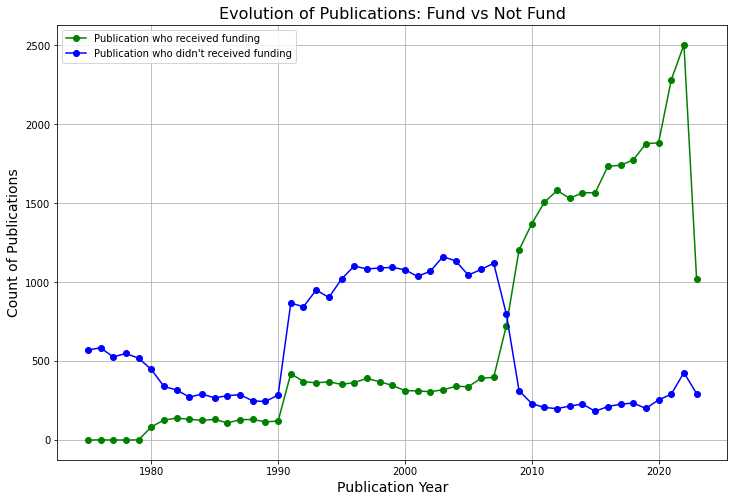

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your dataframe
df = data_trend

plt.figure(figsize=(12, 8))

# Plotting the lines
plt.plot(df.index, df['funding_trend_all'], label='Publication who received funding', marker='o', color='green')
plt.plot(df.index, df['not_funding_trend_all'], label="Publication who didn't received funding", marker='o', color='blue')

# Adding labels, title and legend
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('Count of Publications', fontsize=14)
plt.title('Evolution of Publications: Fund vs Not Fund', fontsize=16)
plt.legend()

# Emphasize the starting point of data for Global South
#plt.annotate('Data for Global South begins (2003)',
#             xy=(2004, df.loc[2004, 'funding_trend_all']),
#             xytext=(2004, df.loc[2004, 'funding_trend_all'] + 500),
#             arrowprops=dict(facecolor='red', shrink=0.05))

# Highlight the recent increase for Global South
#plt.annotate('Rapid increase for Global South (2020)',
#             xy=(2020, df.loc[2020, 'funding_trend_all']),
#             xytext=(2010, df.loc[2016, 'funding_trend_all'] + 500),
#             arrowprops=dict(facecolor='red', shrink=0.05))

# Grid for easier visualization
plt.grid(True)

# Save the plot at 300 dpi
#plt.tight_layout()
plt.savefig('D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/figure/funding_publication_year_plot.png', dpi=300)

plt.show()


## funder

In [ ]:
funder_data['Funding Name Preferred'].count()

33293

In [ ]:
import pandas as pd

# Your DataFrame is named funder_data
funder_list = funder_data['Funding Name Preferred'].str.split(';').explode().str.strip()

# Count the unique funder names
unique_funder_count = funder_list.nunique()

print('The number of unique funder is:', unique_funder_count)

# Count the appearances of each funder
funder_counts = funder_list.value_counts().to_frame()

funder_counts['%'] = funder_counts['Funding Name Preferred']/funder_data['Funding Name Preferred'].count()*100

#


funder_counts.head(50)

The number of unique funder is: 31561


,Funding Name Preferred,%
nigms nih hhs(united states department of health & human servicesnational institutes of health (nih) - usanih national institute of general medical sciences (nigms)),4160,12.495119
national natural science foundation of china(national natural science foundation of china (nsfc)),2077,6.238549
niaid nih hhs(united states department of health & human servicesnational institutes of health (nih) - usanih national institute of allergy & infectious diseases (niaid)),1869,5.613793
national institutes of health(united states department of health & human servicesnational institutes of health (nih) - usa),1399,4.202085
nih(united states department of health & human servicesnational institutes of health (nih) - usa),1332,4.000841
,1258,3.778572
nci nih hhs(united states department of health & human servicesnational institutes of health (nih) - usanih national cancer institute (nci)),1073,3.222900
national science foundation(national science foundation (nsf)),979,2.940558
"grants-in-aid for scientific research(ministry of education, culture, sports, science and technology, japan (mext)japan society for the promotion of sciencegrants-in-aid for scientific research (kakenhi))",593,1.781155
bbsrc(uk research & innovation (ukri)biotechnology and biological sciences research council (bbsrc)),568,1.706064


In [ ]:
funder_list2 = funder_list.to_frame().reset_index().set_index('Funding Name Preferred')
funder_list2

,wos_ID,Publication Year,"Times Cited, All Databases"
Funding Name Preferred,,,
NaN,wos:a1975ak27200035,1975,106
NaN,wos:a1975bb78600005,1975,28
NaN,wos:a1975ak49300025,1975,50
NaN,wos:a1975al49000001,1975,31
NaN,wos:a1975ay53300001,1975,3
...,...,...,...
national health and medical research council (nhmrc)(national health and medical research council (nhmrc) of australia),wos:001003139700001,2023,0
australian government department of health(australian governmentdepartment of health & ageing),wos:001003139700001,2023,0
national research foundation of korea(national research foundation of korea),wos:000912073200001,2023,1


In [ ]:
# import funder clean
funder_counts_clean = pd.read_excel(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/Funding-Name-Preferred-csv2.xls')[
    ['Funding_Name_Preferred','Funding_Name_Preferred.1','Funding_Name_Preferred_clean']].set_index('Funding_Name_Preferred.1')
funder_counts_clean

,Funding_Name_Preferred,Funding_Name_Preferred_clean
Funding_Name_Preferred.1,,
NaN,NaN,NaN
agriculture and horticulture development board,agriculture and horticulture development board,agriculture and horticulture development board
ake wiberg foundation,ake wiberg foundation,ake wiberg foundation
almond board of california,almond board of california,almond board of california
ambrose monell foundation,ambrose monell foundation,ambrose monell foundation
...,...,...
xunta de galicia via an angeles alvarino fellowship,xunta de galicia via an angeles alvarino fello...,xunta de galicia
"xunta de galicia, conselleria de sanidade(xunta de galicia)","xunta de galicia, conselleria de sanidade(xunt...",xunta de galicia
"youth innovation team project for talent introduction and cultivation for the universities in shandong province, china",youth innovation team project for talent intro...,youth innovation team project for talent intro...


In [ ]:
funder_list_and_clean = funder_list2.merge(funder_counts_clean,
                                           left_on='Funding Name Preferred',
                                           right_on='Funding_Name_Preferred',
                                           how='left').set_index(['wos_ID','Publication Year'])
funder_list_and_clean

Times Cited, All Databases  \
wos_ID              Publication Year                               
wos:a1975ak27200035 1975                                     106   
wos:a1975bb78600005 1975                                      28   
wos:a1975ak49300025 1975                                      50   
wos:a1975al49000001 1975                                      31   
wos:a1975ay53300001 1975                                       3   
...                                                          ...   
wos:001003139700001 2023                                       0   
                    2023                                       0   
wos:000912073200001 2023                                       1   
                    2023                                       1   
                    2023                                       1   

                                                                 Funding_Name_Preferred  \
wos_ID              Publication Year                                                      
wos:a1975ak27200035 1975                                                            NaN   
wos:a1975bb78600005 1975                                                            NaN   
wos:a1975ak49300025 1975                                                            NaN   
wos:a1975al49000001 1975                                                            NaN   
wos:a1975ay53300001 1975                                                            NaN   
...                                                                                 ...   
wos:001003139700001 2023              national health and medical research council (...   
                    2023              australian government department of health(aus...   
wos:000912073200001 2023              national research foundation of korea(national...   
                    2023              development of next-generation biorefinery pla...   
                    2023              national research foundation supported by the ...   

                                                           Funding_Name_Preferred_clean  
wos_ID              Publication Year                                                     
wos:a1975ak27200035 1975                                                            NaN  
wos:a1975bb78600005 1975                                                            NaN  
wos:a1975ak49300025 1975                                                            NaN  
wos:a1975al49000001 1975                                                            NaN  
wos:a1975ay53300001 1975                                                            NaN  
...                                                                                 ...  
wos:001003139700001 2023              national health and medical research council (...  
                    2023              australian government department of health(aus...  
wos:000912073200001 2023                    national research foundation of korea (nrf)  
                    2023              development of next-generation biorefinery pla...  
                    2023                    national research foundation of korea (nrf)  

[113235 rows x 3 columns]

In [ ]:
# Count the unique funder clean names
unique_funder_clean_count = funder_list_and_clean['Funding_Name_Preferred_clean'].nunique()

print('The number of unique funder_clean is:', unique_funder_clean_count)

#
funder_list_and_clean2 = funder_list_and_clean.reset_index()

# and sum citations within each group
grouped = funder_list_and_clean2.groupby(['Funding_Name_Preferred_clean']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['%'] = grouped['wos_ID']/funder_data['Funding Name Preferred'].count()*100

# Rename columns
grouped.columns = ['Funding_Name_Preferred_clean', 'count','citation', '%']

# Save data
grouped.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/funder_clean_counts_citation.pkl')
grouped.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/funder_clean_counts_citation.csv')

grouped.head(50)

The number of unique funder_clean is: 18092


,Funding_Name_Preferred_clean,count,citation,%
0,'association de chefs de service du chru de na...,1,1,0.003004
1,'castile and leon' autonomy (spain),1,4,0.003004
2,"'centre de recherche public-sante', luxembourg",2,34,0.006007
3,'complexo de central de apoio a pesquisa (comc...,1,11,0.003004
4,'conseil general de l'eure',1,13,0.003004
5,'conseil regional de basse normandie'(region n...,2,33,0.006007
6,'dim1health' doctoral fellowship,1,8,0.003004
7,'direccion general de universidades del gobier...,1,1,0.003004
8,'environmental and functional genomics platfor...,1,46,0.003004
9,'evolution and transfer of antibiotic resistan...,1,19,0.003004


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Reset the index to make 'Publication Year' a regular column
funder_list_and_clean2 = funder_list_and_clean.drop(columns='Funding_Name_Preferred').drop_duplicates().dropna().reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
funder_list_and_clean2['Year Group'] = pd.cut(funder_list_and_clean2['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Group by 'Year Group' and count author appearances in each group
funder_counts_group = funder_list_and_clean2.groupby('Year Group')[funder_list_and_clean2.columns[-1]].value_counts().to_frame()

# Convert the Series to a DataFrame and rename the column
funder_counts_group = funder_counts_group.rename(columns={'Year Group': 'counts'}).reset_index().drop(columns='level_1')

# Create a boolean mask to identify rows with 0 in the specified columns
mask = (funder_counts_group['counts'] == 0)#.any(axis=1)

# Use the mask to drop rows with 0 in the specified columns
funder_counts_group_filtered = funder_counts_group[~mask]

# Print the result
funder_counts_group_filtered.tail(60)

,Year Group,counts
0,"(1973, 1978]",3
10,"(1978, 1983]",13
20,"(1983, 1988]",10
30,"(1988, 1993]",11
40,"(1993, 1998]",10
50,"(1998, 2003]",22
60,"(2003, 2008]",551
70,"(2008, 2013]",4856
80,"(2013, 2018]",5615
90,"(2018, 2023]",7001


In [ ]:
# Reset the index to make 'Publication Year' a regular column
funder_list_and_clean3 = funder_list_and_clean.drop(columns='Funding_Name_Preferred').dropna().reset_index()
# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
funder_list_and_clean3['Year Group'] = pd.cut(funder_list_and_clean3['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Group by 'Year Group' and 'Funding_Name_Preferred_clean', count number of publications
# and sum citations within each group
grouped = funder_list_and_clean3.groupby(['Year Group','Funding_Name_Preferred_clean']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Create a boolean mask to identify rows with 0 in the 'wos_ID' column
mask = (grouped['wos_ID'] == 0)

# Use the mask to drop rows with 0 in the 'wos_ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Year Group','Funding_Name_Preferred_clean', 'Publication Count', 'Total Citations']

grouped_filtered


,Year Group,Funding_Name_Preferred_clean,Publication Count,Total Citations
9451,"(1973, 1978]",medical research council uk (mrc),1,153
17207,"(1973, 1978]",usanih national institute of allergy & infecti...,2,30
17213,"(1973, 1978]",usanih national institute of general medical s...,3,46
20700,"(1978, 1983]",cit nih hhs,1,28
21189,"(1978, 1983]",csap samhsa hhs,1,5
...,...,...,...,...
180912,"(2018, 2023]",zonmw(netherlands organization for health rese...,1,2
180913,"(2018, 2023]",zukunftskonzept of tu dresden (federal and sta...,1,8
180914,"(2018, 2023]",zukunftskonzept of tu dresden (federal),1,3
180915,"(2018, 2023]",zunyi science and technology cooperation,2,15


In [ ]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Funding_Name_Preferred_clean', columns='Year Group', values=['Publication Count', 'Total Citations'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/funder_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/funder_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count  \
Year Group                                              (1973, 1978]   
Funding_Name_Preferred_clean                                           
'association de chefs de service du chru de nan...               NaN   
'castile and leon' autonomy (spain)                              NaN   
'centre de recherche public-sante', luxembourg                   NaN   
'complexo de central de apoio a pesquisa (comca...               NaN   
'conseil general de l'eure'                                      NaN   
...                                                              ...   
zunyi science and technology cooperation                         NaN   
zurcher krebsliga                                                NaN   
zurich center for integrative human physiology ...               NaN   
zymo research                                                    NaN   
zymogenetics                                                     NaN   

                                                                              \
Year Group                                         (1978, 1983] (1983, 1988]   
Funding_Name_Preferred_clean                                                   
'association de chefs de service du chru de nan...          NaN          NaN   
'castile and leon' autonomy (spain)                         NaN          NaN   
'centre de recherche public-sante', luxembourg              NaN          NaN   
'complexo de central de apoio a pesquisa (comca...          NaN          NaN   
'conseil general de l'eure'                                 NaN          NaN   
...                                                         ...          ...   
zunyi science and technology cooperation                    NaN          NaN   
zurcher krebsliga                                           NaN          NaN   
zurich center for integrative human physiology ...          NaN          NaN   
zymo research                                               NaN          NaN   
zymogenetics                                                NaN          NaN   

                                                                              \
Year Group                                         (1988, 1993] (1993, 1998]   
Funding_Name_Preferred_clean                                                   
'association de chefs de service du chru de nan...          NaN          NaN   
'castile and leon' autonomy (spain)                         NaN          NaN   
'centre de recherche public-sante', luxembourg              NaN          NaN   
'complexo de central de apoio a pesquisa (comca...          NaN          NaN   
'conseil general de l'eure'                                 NaN          NaN   
...                                                         ...          ...   
zunyi science and technology cooperation                    NaN          NaN   
zurcher krebsliga                                           NaN          NaN   
zurich center for integrative human physiology ...          NaN          NaN   
zymo research                                               NaN          NaN   
zymogenetics                                                NaN          NaN   

                                                                              \
Year Group                                         (1998, 2003] (2003, 2008]   
Funding_Name_Preferred_clean                                                   
'association de chefs de service du chru de nan...          NaN          NaN   
'castile and leon' autonomy (spain)                         NaN          NaN   
'centre de recherche public-sante', luxembourg              NaN          NaN   
'complexo de central de apoio a pesquisa (comca...          NaN          NaN   
'conseil general de l'eure'                                 NaN          NaN   
...                                                         ...          ...   
zunyi science and technology cooperation                    NaN          NaN   


# topics

In [ ]:
topics_data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/topic_modeling_lemmatized_topics.pkl')[['Topic N°']]
topics_data

,,Topic N°
wos_ID,Publication Year,
wos:a1975ak27200035,1975,49
wos:a1975bb78600005,1975,30
wos:a1975ak49300025,1975,30
wos:a1975al49000001,1975,47
wos:a1975ay53300001,1975,36
...,...,...
wos:000968835000001,2023,29
wos:000933339800001,2023,58
wos:000914484900001,2023,1


In [ ]:
citation_data = data.copy().reset_index().set_index(['wos_ID','Publication Year'])[['Times Cited, All Databases']]
citation_data

,,"Times Cited, All Databases"
wos_ID,Publication Year,
wos:a1975ak27200035,1975,106
wos:a1975bb78600005,1975,28
wos:a1975ak49300025,1975,50
wos:a1975al49000001,1975,31
wos:a1975ay53300001,1975,3
...,...,...
wos:000968835000001,2023,0
wos:000933339800001,2023,0
wos:000914484900001,2023,5


In [ ]:
topics_data_citation = pd.concat([topics_data, citation_data], axis=1)
topics_data_citation

,,Topic N°,"Times Cited, All Databases"
wos_ID,Publication Year,,
wos:a1975ak27200035,1975,49,106
wos:a1975bb78600005,1975,30,28
wos:a1975ak49300025,1975,30,50
wos:a1975al49000001,1975,47,31
wos:a1975ay53300001,1975,36,3
...,...,...,...
wos:000968835000001,2023,29,0
wos:000933339800001,2023,58,0
wos:000914484900001,2023,1,5


In [ ]:
# Count the unique topic names
unique_topic_count = topics_data_citation['Topic N°'].nunique()

print('The number of unique topics is:', unique_topic_count)

#
topics_data_citation2 = topics_data_citation.reset_index()

# and sum citations within each group
grouped = topics_data_citation2.groupby(['Topic N°']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['%'] = grouped['wos_ID']/topics_data_citation['Topic N°'].count()*100

grouped['citation_means'] = grouped['Times Cited, All Databases']/grouped['wos_ID']

# Rename columns
grouped.columns = ['Topic N°', 'Publication Count', 'Total Citations', '%','citation_means']

# Save data
grouped.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/topics_counts_citation.pkl')
grouped.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/topics_counts_citation.csv')

grouped.head(50)

The number of unique topics is: 100


,Topic N°,Publication Count,Total Citations,%,citation_means
0,0,121,3266,0.196607,26.991736
1,1,1447,67646,2.351163,46.749136
2,2,1050,32866,1.706096,31.300952
3,3,595,26287,0.966788,44.179832
4,4,364,13830,0.591447,37.994505
5,5,516,21772,0.838425,42.193798
6,6,661,29029,1.074028,43.916793
7,7,201,5213,0.326596,25.935323
8,8,965,30505,1.567984,31.611399
9,9,37,1168,0.060120,31.567568


In [ ]:
topics_data2 = topics_data_citation.reset_index()#.set_index('wos_ID')
# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
topics_data2['Year Group'] = pd.cut(topics_data2['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Group by 'Year Group' and 'Topic N°', count number of publications
# and sum citations within each group
grouped = topics_data2.groupby(['Year Group','Topic N°']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Create a boolean mask to identify rows with 0 in the 'wos_ID' column
mask = (grouped['wos_ID'] == 0)

# Use the mask to drop rows with 0 in the 'wos_ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Year Group','Topic N°', 'Publication Count', 'Total Citations']

grouped_filtered


,Year Group,Topic N°,Publication Count,Total Citations
0,"(1973, 1978]",0,2,31
1,"(1973, 1978]",1,5,429
2,"(1973, 1978]",2,38,502
3,"(1973, 1978]",3,27,1318
4,"(1973, 1978]",4,31,3113
...,...,...,...,...
995,"(2018, 2023]",95,1047,5328
996,"(2018, 2023]",96,93,981
997,"(2018, 2023]",97,5,28
998,"(2018, 2023]",98,25,192


In [ ]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Topic N°', columns='Year Group', values=['Publication Count', 'Total Citations'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/topics_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/topics_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count                                         \
Year Group      (1973, 1978] (1978, 1983] (1983, 1988] (1988, 1993]   
Topic N°                                                              
0                        2.0         11.0         18.0         20.0   
1                        5.0          7.0          4.0         20.0   
2                       38.0         29.0         34.0        122.0   
3                       27.0         11.0         19.0         24.0   
4                       31.0         33.0         46.0         77.0   
...                      ...          ...          ...          ...   
95                      32.0         50.0         43.0         90.0   
96                       2.0          5.0          3.0         32.0   
97                       1.0          2.0          3.0          NaN   
98                       4.0          7.0          3.0         51.0   
99                      20.0         19.0         21.0         60.0   

                                                                             \
Year Group (1993, 1998] (1998, 2003] (2003, 2008] (2008, 2013] (2013, 2018]   
Topic N°                                                                      
0                  17.0         15.0         10.0          7.0          6.0   
1                  37.0         46.0         89.0        206.0        369.0   
2                 171.0        152.0        136.0        145.0        117.0   
3                  36.0         72.0         79.0        107.0        124.0   
4                  65.0         48.0         28.0         17.0         13.0   
...                 ...          ...          ...          ...          ...   
95                 71.0         53.0        109.0        277.0        579.0   
96                 70.0         72.0         65.0         71.0         93.0   
97                  3.0          2.0          1.0          3.0          4.0   
98                 82.0         67.0         78.0         57.0         44.0   
99                 76.0         33.0         20.0         15.0         15.0   

                        Total Citations                            \
Year Group (2018, 2023]    (1973, 1978] (1978, 1983] (1983, 1988]   
Topic N°                                                            
0                  15.0            31.0        213.0        820.0   
1                 664.0           429.0        307.0         56.0   
2                 106.0           502.0        448.0        505.0   
3                  96.0          1318.0        314.0       1467.0   
4                   6.0          3113.0       1143.0       1378.0   
...                 ...             ...          ...          ...   
95               1047.0           971.0        577.0        987.0   
96                 93.0             7.0         57.0         67.0   
97                  5.0            49.0         10.0        107.0   
98                 25.0            79.0        136.0        200.0   
99                 12.0           563.0       1010.0       1116.0   

                                                                             \
Year Group (1988, 1993] (1993, 1998] (1998, 2003] (2003, 2008] (2008, 2013]   
Topic N°                                                                      
0                 751.0        533.0        454.0        168.0        175.0   
1                3674.0       4148.0       4677.0       8707.0      15136.0   
2                3368.0       7906.0       7247.0       6211.0       4560.0   
3                1239.0       2144.0       5826.0       5610.0       5084.0   
4                2413.0       2664.0       1932.0        513.0        351.0   
...                 ...          ...          ...          ...          ...   
95               1995.0       1929.0       2770.0       4957.0       8066.0   
96               1692.0       3119.0       3105.0       4874.0       1800.0   
97                  NaN         78.0        205.0         26.0         51

In [ ]:
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [ ]:
country_data['number_of_country'] = country_data.notnull().sum(axis=1)
number_country = country_data[['number_of_country']]
number_country = number_country.reset_index().rename(columns = {'UT (Unique WOS ID)':'wos_ID'})
number_country['wos_ID'] = number_country['wos_ID'].str.lower()
number_country

In [ ]:
number_country.describe()

In [ ]:
number_country.isna().sum()

In [ ]:
# number_country.head(60)

In [ ]:
data_and_number_country = pd.concat([data.set_index('wos_ID'),
                           number_country.set_index('wos_ID')],
                          axis=1)
data_and_number_country.head(2)

In [ ]:
# to drop rows with 0 values in column 'number_of_country':
data_and_number_country = data_and_number_country[data_and_number_country['number_of_country'] != 0]

In [ ]:
# data_and_number_country.describe()

In [ ]:
data_and_number_country.isna().sum()

## analysis based on number of country

### proportion all

In [ ]:
data_and_number_country['number_of_country'].isna().sum()

In [ ]:
data_and_number_countryT = data_and_number_country.T

data_and_number_countryT['countries'] = data_and_number_countryT.index

number_of_country_mean_list = []
number_of_country_count_list = []
for country in data_and_number_country.columns:
    number_of_country_count_list.append(data_and_number_country.dropna(subset=[country])['number_of_country'].count())
    number_of_country_mean_list.append(data_and_number_country.dropna(subset=[country])['number_of_country'].mean())

# rename countries names on columns
countries = data_and_number_country.columns.to_list()
number_of_country_count  = number_of_country_count_list
number_of_country_mean = number_of_country_mean_list

data_and_number_countryT_count = pd.DataFrame({'countries': countries, 'all_number_of_country_count': number_of_country_count})
data_and_number_countryT_mean = pd.DataFrame({'countries': countries, 'all_number_of_country_mean': number_of_country_mean})

# ********
data_and_number_countryT_concat = data_and_number_countryT.reset_index().merge(data_and_number_countryT_count, on = 'countries', how='left')
data_and_number_countryT_concat = data_and_number_countryT_concat.merge(data_and_number_countryT_mean, on = 'countries', how='left')

data_and_number_countryT_concat_all = data_and_number_countryT_concat[['countries','all_number_of_country_count','all_number_of_country_mean']]

# save data
data_and_number_countryT_concat_all.to_csv(f'../TABLES/region_countries_org_number_of_country_count_mean.csv')
data_and_number_countryT_concat_all

In [ ]:
len(number_of_country_count)

In [ ]:
len(number_of_country_mean)

In [ ]:
len(countries)

In [ ]:
vvvvvvvvvvvvvvvvvv

### proportion fund

In [ ]:
data_and_number_country_fund = data_and_number_country.loc[data_and_number_country['funding_yes'] == 1]
data_and_number_country_fund.shape

In [ ]:
data_and_number_countryT = data_and_number_country_fund.T

data_and_number_countryT['countries'] = data_and_number_countryT.index

number_of_country_mean_list = []
number_of_country_count_list = []
for country in data_and_number_country_fund.columns:
    number_of_country_count_list.append(data_and_number_country_fund.dropna(subset=[country])['number_of_country'].count())
    number_of_country_mean_list.append(data_and_number_country_fund.dropna(subset=[country])['number_of_country'].mean())

# rename countries names on columns
countries = data_and_number_country_fund.columns.to_list()
number_of_country_count  = number_of_country_count_list
number_of_country_mean = number_of_country_mean_list

data_and_number_countryT_count = pd.DataFrame({'countries': countries, 'fund_number_of_country_count': number_of_country_count})
data_and_number_countryT_mean = pd.DataFrame({'countries': countries, 'fund_number_of_country_mean': number_of_country_mean})

# ********
data_and_number_countryT_concat = data_and_number_countryT.reset_index().merge(data_and_number_countryT_count, on = 'countries', how='left')
data_and_number_countryT_concat = data_and_number_countryT_concat.merge(data_and_number_countryT_mean, on = 'countries', how='left')

data_and_number_countryT_concat_number_of_country_fund = data_and_number_countryT_concat[['countries','fund_number_of_country_count','fund_number_of_country_mean']]

# save data
# data_and_number_countryT_concat_all.to_csv(f'../TABLES/countries_fund_number_of_country_count_mean.csv')
data_and_number_countryT_concat_number_of_country_fund

### proportion no fund

In [ ]:
data_and_number_country_no_fund = data_and_number_country.loc[data_and_number_country['funding_yes'] == 0]
data_and_number_country_no_fund.shape

In [ ]:
data_and_number_countryT = data_and_number_country_no_fund.T

data_and_number_countryT['countries'] = data_and_number_countryT.index

number_of_country_mean_list = []
number_of_country_count_list = []
for country in data_and_number_country_no_fund.columns:
    number_of_country_count_list.append(data_and_number_country_no_fund.dropna(subset=[country])['number_of_country'].count())
    number_of_country_mean_list.append(data_and_number_country_no_fund.dropna(subset=[country])['number_of_country'].mean())

# rename countries names on columns
countries = data_and_number_country_no_fund.columns.to_list()
number_of_country_count  = number_of_country_count_list
number_of_country_mean = number_of_country_mean_list

data_and_number_countryT_count = pd.DataFrame({'countries': countries, 'no_fund_number_of_country_count': number_of_country_count})
data_and_number_countryT_mean = pd.DataFrame({'countries': countries, 'no_fund_number_of_country_mean': number_of_country_mean})

# ********
data_and_number_countryT_concat = data_and_number_countryT.reset_index().merge(data_and_number_countryT_count, on = 'countries', how='left')
data_and_number_countryT_concat = data_and_number_countryT_concat.merge(data_and_number_countryT_mean, on = 'countries', how='left')

data_and_number_countryT_concat_number_of_country_nofund = data_and_number_countryT_concat[['countries','no_fund_number_of_country_count','no_fund_number_of_country_mean']]

# save data
# data_and_number_countryT_concat_all.to_csv(f'../TABLES/countries_no_fund_number_of_country_count_mean.csv')
data_and_number_countryT_concat_number_of_country_nofund

### concat and save data

In [ ]:
# concatenate dataframes on index
concat_data_number_of_country_list = pd.concat([data_and_number_countryT_concat_all.set_index('countries'),
                                    data_and_number_countryT_concat_number_of_country_fund.set_index('countries'),
                                    data_and_number_countryT_concat_number_of_country_nofund.set_index('countries')],
                                    axis=1)
# save data
concat_data_number_of_country_list.to_csv(f'../TABLES/concat_data_number_of_country_list.csv')
concat_data_number_of_country_list

### significance

In [ ]:
number_country.describe()

In [ ]:
fund_number_of_country = data_and_number_country.loc[data_and_number_country['funding_yes'] == 1]['number_of_country']#.to_list()
fund_number_of_country.describe()

In [ ]:
no_fund_number_of_country = data_and_number_country.loc[data_and_number_country['funding_yes'] == 0]['number_of_country']#.to_list()
no_fund_number_of_country.describe()

In [ ]:
test_sig(fund_number_of_country, no_fund_number_of_country)

In [ ]:
fund_number_of_country_new = [x for x in fund_number_of_country if x != 0]
no_fund_number_of_country_new = [x for x in no_fund_number_of_country if x != 0]

In [ ]:
test_sig(fund_number_of_country_new, no_fund_number_of_country_new)

In [ ]:
import plotly.express as px
fig = px.box(data_and_number_country, x="funding_yes", y='number_of_country', color="funding_yes")
# setting the y-axis range from 0 to 50
fig.update_layout(yaxis_range=[-2,100])
fig.update_layout(font_size=20)

fig.show()